In [ ]:
!pip install opencv-python numpy gdown



In [ ]:
# Download model zip from Google Drive
!gdown https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS

# Unzip the models (overwrite if already present)
!unzip -o modelNweight.zip

# Check extracted files
!ls


Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open modelNweight.zip, modelNweight.zip.zip or modelNweight.zip.ZIP.
 age_deploy.prototxt			    kid1.jpg
 age_net.caffemodel			    kid2.jpg
 _config.yml				    LICENSE
 detect.py				    man1.jpg
 Example				    man2.jpg
'Gender-and-Age-Detection-master (1).zip'   opencv_face_detector.pbtxt
 gender_deploy.prototxt			    opencv_face_detector_uint8.pb
 gender_net.caffemodel			    README.md
 girl1.jpg				    woman1.jpg
 girl2.jpg


In [5]:
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # First uploaded image


Saving girl1.jpg to girl1 (1).jpg


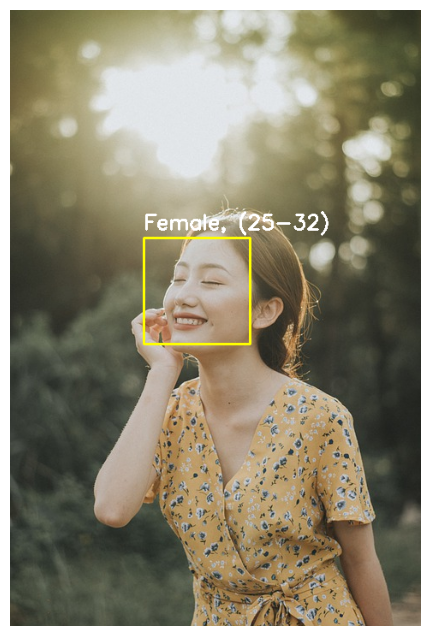

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Model paths (adjust if inside a folder after unzip)
age_proto = "age_deploy.prototxt"
age_model = "age_net.caffemodel"
gender_proto = "gender_deploy.prototxt"
gender_model = "gender_net.caffemodel"

# Load models
age_net = cv2.dnn.readNet(age_model, age_proto)
gender_net = cv2.dnn.readNet(gender_model, gender_proto)

# Mean values for preprocessing
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

# Labels
AGE_LIST = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
            '(25-32)', '(38-43)', '(48-53)', '(60-100)']
GENDER_LIST = ['Male', 'Female']

# Face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Lighting enhancement
def enhance_lighting(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# Prediction function
def predict_age_gender(face_img):
    blob = cv2.dnn.blobFromImage(face_img, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
    gender_net.setInput(blob)
    gender = GENDER_LIST[gender_net.forward()[0].argmax()]
    age_net.setInput(blob)
    age = AGE_LIST[age_net.forward()[0].argmax()]
    return gender, age

# Read and process image
frame = cv2.imread(image_path)
enhanced_frame = enhance_lighting(frame)
gray = cv2.cvtColor(enhanced_frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

for (x, y, w, h) in faces:
    face_img = enhanced_frame[y:y+h, x:x+w].copy()
    gender, age = predict_age_gender(face_img)
    label = f"{gender}, {age}"
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,
                0.8, (255, 255, 255), 2)

# Show result
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
